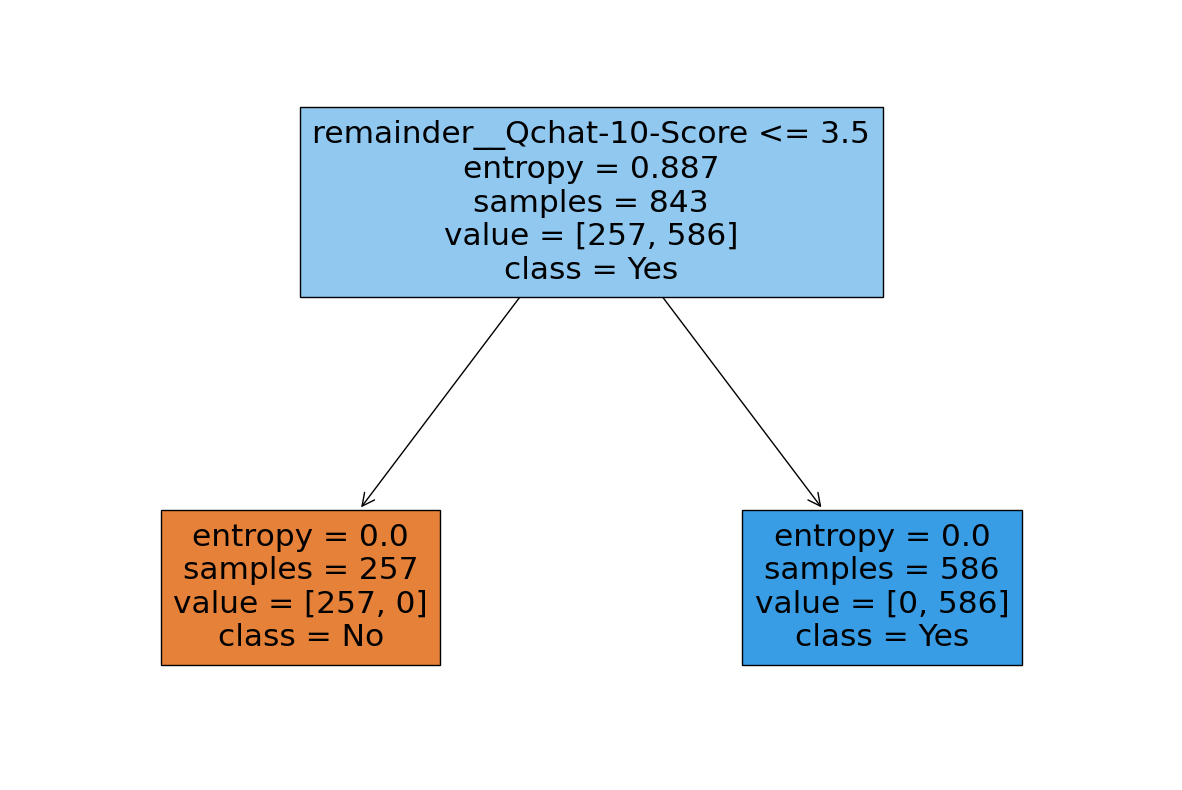

In [6]:
## A1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv(r"C:\Users\hp\Desktop\jupyter projects\shrest\Toddler Autism dataset July 2018.csv")

# Selecting features and target variable
X = data.drop(columns=['Case_No', 'Class/ASD Traits'])  # Features
y = data['Class/ASD Traits']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical features for one-hot encoding
categorical_features = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test']

# Define the column transformer
column_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)

# Fit and transform the categorical features
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_train_encoded, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=column_transformer.get_feature_names_out(), class_names=['No', 'Yes'], filled=True)
plt.show()


In [8]:
## A2
import pandas as pd

def bin_continuous_feature(data, feature, bins=None, binning_type='equal_width'):

    # If no bins are specified, use a default value
    if bins is None:
        bins = 10  # Default number of bins
    
    # Copy the original DataFrame to avoid modifying the original data
    binned_data = data.copy()
    
    # Perform binning
    if binning_type == 'equal_width':
        binned_data[feature + '_binned'] = pd.cut(binned_data[feature], bins=bins)
    elif binning_type == 'frequency':
        binned_data[feature + '_binned'] = pd.qcut(binned_data[feature], q=bins, duplicates='drop')
    else:
        raise ValueError("Invalid binning type. Please use 'equal_width' or 'frequency'.")
    
    return binned_data

# Example usage
data = pd.read_csv(r"C:\Users\hp\Desktop\jupyter projects\shrest\Toddler Autism dataset July 2018.csv")
binned_data = bin_continuous_feature(data, 'Age_Mons', bins=5, binning_type='equal_width')
print(binned_data.head())


   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits Age_Mons_binned  
0            

In [19]:
import pandas as pd

# Read the dataset
data = pd.read_csv(r"C:\Users\hp\Desktop\jupyter projects\shrest\Toddler Autism dataset July 2018.csv")

# Display the first few rows of the dataset
print(data.head())

# Check the data types of each column
print(data.dtypes)


   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits  
0               No  
1       

In [6]:
print(df.columns)


Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex_f', 'Sex_m', 'Ethnicity_Hispanic',
       'Ethnicity_Latino', 'Ethnicity_Native Indian', 'Ethnicity_Others',
       'Ethnicity_Pacifica', 'Ethnicity_White European', 'Ethnicity_asian',
       'Ethnicity_black', 'Ethnicity_middle eastern', 'Ethnicity_mixed',
       'Ethnicity_south asian', 'Jaundice_no', 'Jaundice_yes',
       'Family_mem_with_ASD_no', 'Family_mem_with_ASD_yes',
       'Who completed the test_Health Care Professional',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member', 'Class/ASD Traits_No',
       'Class/ASD Traits_Yes'],
      dtype='object')


In [9]:
## A3
import numpy as np
import pandas as pd

class CustomDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_instance(x, self.tree) for x in X])

    def _build_tree(self, X, y, depth):
        if depth == self.max_depth or len(set(y)) == 1:
            return (None, None, None, None, np.argmax(np.bincount(y)))  # Return a leaf node tuple

        best_feature, best_threshold = self._find_best_split(X, y)

        if best_feature is None:
            return (None, None, None, None, np.argmax(np.bincount(y)))  # Return a leaf node tuple

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices

        if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
            return (None, None, None, None, np.argmax(np.bincount(y)))  # Return a leaf node tuple

        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return (best_feature, best_threshold, left_tree, right_tree, None)  # Return a non-leaf node tuple

    def _predict_instance(self, x, tree):
        if tree[4] is not None:
            return tree[4]  # Return the class label directly if it's a leaf node

        feature, threshold, left_tree, right_tree, _ = tree
        if x[feature] <= threshold:
            return self._predict_instance(x, left_tree)
        else:
            return self._predict_instance(x, right_tree)

    def _find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_info_gain = -np.inf

        for feature_idx in range(X.shape[1]):
            values = np.unique(X[:, feature_idx])
            if len(values) == 1:  # Skip categorical features with only one unique value
                continue

            thresholds = (values[:-1] + values[1:]) / 2

            for threshold in thresholds:
                left_indices = X[:, feature_idx] <= threshold
                right_indices = ~left_indices

                info_gain = self._calculate_info_gain(y, left_indices, right_indices)

                if info_gain > best_info_gain:
                    best_feature = feature_idx
                    best_threshold = threshold
                    best_info_gain = info_gain

        return best_feature, best_threshold

    def _calculate_info_gain(self, y, left_indices, right_indices):
        total_samples = len(y)
        left_weight = len(y[left_indices]) / total_samples
        right_weight = len(y[right_indices]) / total_samples

        left_entropy = self._calculate_entropy(y[left_indices])
        right_entropy = self._calculate_entropy(y[right_indices])

        info_gain = self._calculate_entropy(y) - (left_weight * left_entropy + right_weight * right_entropy)
        return info_gain

    def _calculate_entropy(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

# Load the dataset
dataset_path = "C:/Users/hp/Desktop/jupyter projects/shrest/Toddler Autism dataset July 2018.csv"
df = pd.read_csv(dataset_path)

# Drop any rows with missing values
df = df.dropna()

# Convert categorical features to numeric using one-hot encoding
df = pd.get_dummies(df)

# Define features and target
features = df.columns[:-2]  # Exclude both target columns
target_column = 'Class/ASD Traits_No'  # Use 'Class/ASD Traits_No' as the target column
X = df[features]
y = df[target_column]

# Instantiate and fit the decision tree
dt = CustomDecisionTree(max_depth=3)
dt.fit(X, y)

# Make predictions
predictions = dt.predict(X)
print("Predictions:", predictions)


Predictions: [1 0 0 ... 0 1 0]
